# Case study on Pre-processing

## Question

Do the following on titanic dataset.

  **1. Load the dataset into python environment**
  
  **2. Make ‘PassengerId’ as the index column**
  
  **3. Check the basic details of the dataset**
  
  **4. Fill in all the missing values present in all the columns in the dataset**
  
  **5. Check and handle outliers in at least 3 columns in the dataset**
  
  **6. Do min max scaling on the feature set (Take ‘Survived’ as target)**

## Answer

In [1]:
# importing python libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Load the dataset into python environment

In [88]:
data=pd.read_csv('titanic_dataset.csv')
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2. Make ‘PassengerId’ as the index column

In [89]:
data=pd.read_csv('titanic_dataset.csv',index_col='PassengerId')
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [154]:
# Another method to make a column as index
data.set_index('PassengerId').head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 3. Check the basic details of the dataset

In [4]:
data.shape

(891, 11)

In [5]:
data.nunique()

Survived      2
Pclass        3
Name        891
Sex           2
Age          88
SibSp         7
Parch         7
Ticket      681
Fare        248
Cabin       147
Embarked      3
dtype: int64

In [99]:
print(data.Sex.value_counts())
print(data.Survived.value_counts())

male      577
female    314
Name: Sex, dtype: int64
0    549
1    342
Name: Survived, dtype: int64


In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [6]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:>

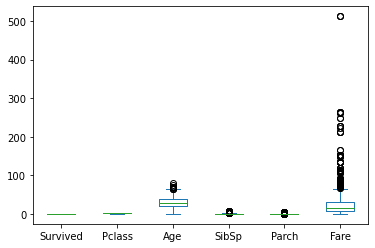

In [92]:
# plotting boxplot of the entire dataset
data.plot(kind='box')

### Observations:  

* **This is a dataset consisting the information about the passengers in Titanic ship.**
* **there are 891 entries and 11 features with datatypes-integer(64),float(64) and object.**
* **there was 577 males 314 females in the ship. from them,only 342 were survived and 549 were lost in North Atlantic.**
* **found miising values in columns-Age(177),Cabin(687) and Embarked(2) columns.among them Cabin contain huge missing values**
* **from the describe function we can see that the standard deviation is high for Fare column with std of 49.693429.**
* **from the boxplot ,the outliers are clearly visible for Age,Sibsp,Parch and Fare columns.Fare has large number of outliers compared to others.**

## 4. Fill in all the missing values present in all the columns in the dataset

In [29]:
# checking for null values
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

**null values present in 3 columns:Age,Cabin and Embarked**

In [30]:
data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

<function matplotlib.pyplot.show(close=None, block=None)>

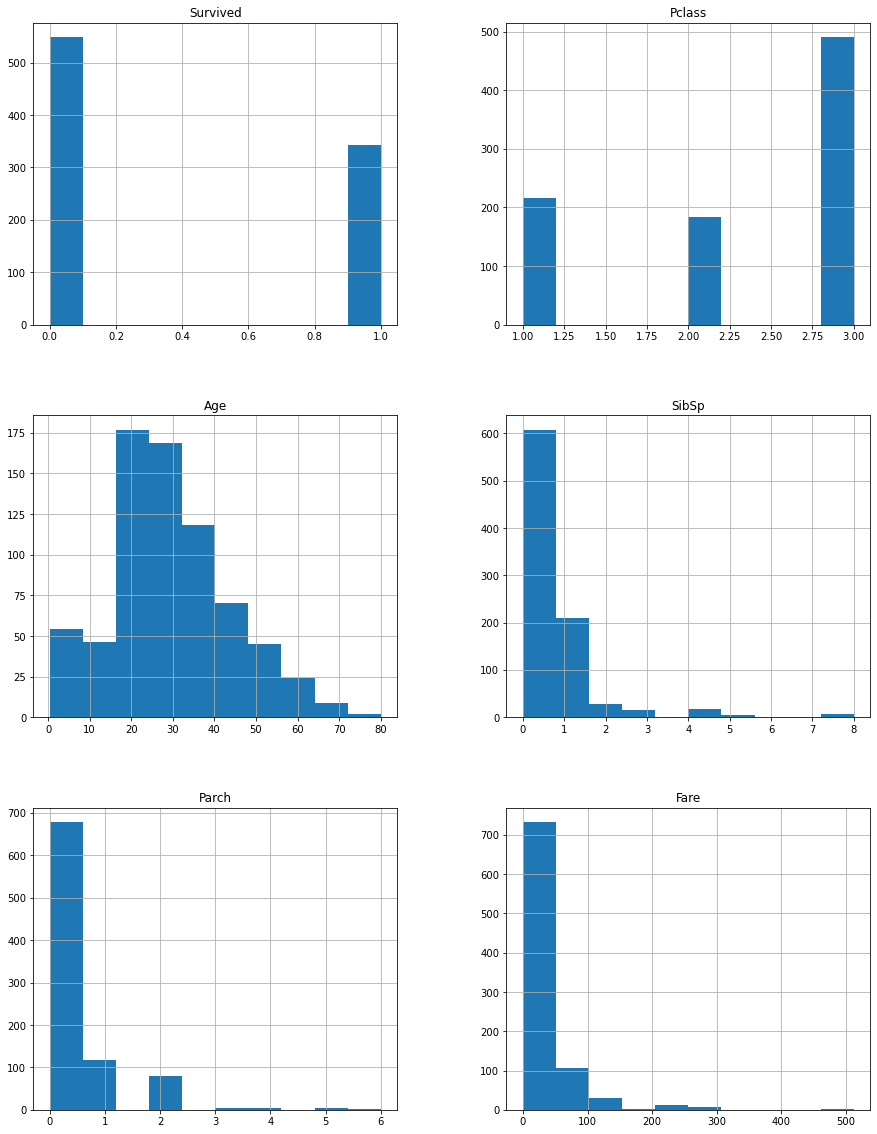

In [31]:
# Plotting histogram to understand the distribution of features
freqgraph=data.select_dtypes(include=['float','int'])
freqgraph.hist(figsize=(15,20))
plt.show

### Insights:

* **Age column is almost normally distributed.Even it is normally distributed we cannot fill the missing values with its mean because it deals with Age of the passengers,Thus we can use median intstead of mean.**
* **Sibsp ,Parch and fare are right skewed .thus we can use median to fill the missing values here ,but there is no null values in these columns.**
* **Embarked and Cabin are object data type .here mode can be used to fill null values.**

In [33]:
# filling missing values  in 'Age' using median
data['Age']=data['Age'].fillna(data['Age'].median())

In [34]:
# filling missing values  in 'cabin' using a string ('unknown'), it has huge count of missing values.
data['Cabin']=data['Cabin'].fillna('Unknown')

In [35]:
data['Embarked'].mode()

0    S
dtype: object

In [36]:
# filling missing values  in 'Embarked' using mode('s')
data['Embarked']=data['Embarked'].fillna('S')

In [37]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [ ]:
# Now the dataset has no null values.

In [38]:
# Displaying cleared dataset
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S


## 5. Check and handle outliers in at least 3 columns in the dataset

**handling outliers in Age column.**

Text(0.5, 1.0, 'Boxplot of Age')

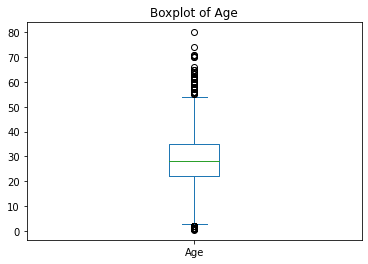

In [39]:
# Diplaying outliers in Age using boxplot
data['Age'].plot(kind='box')
plt.title('Boxplot of Age')

In [40]:
# executing codes to reduce the outliers
Q1 = np.percentile(data['Age'], 25, interpolation = "midpoint")
Q2 = np.percentile(data['Age'], 50, interpolation = "midpoint")
Q3 = np.percentile(data['Age'], 75, interpolation = "midpoint")
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
upper_lim=Q3+1.5*IQR

In [41]:
print(low_lim)
print(upper_lim)

2.5
54.5


In [42]:
outlier=[]
for x in data['Age']:
    if((x>upper_lim) or (x<low_lim)):
        outlier.append(x)
print(outlier)        
    

[2.0, 58.0, 55.0, 2.0, 66.0, 65.0, 0.83, 59.0, 71.0, 70.5, 2.0, 55.5, 1.0, 61.0, 1.0, 56.0, 1.0, 58.0, 2.0, 59.0, 62.0, 58.0, 63.0, 65.0, 2.0, 0.92, 61.0, 2.0, 60.0, 1.0, 1.0, 64.0, 65.0, 56.0, 0.75, 2.0, 63.0, 58.0, 55.0, 71.0, 2.0, 64.0, 62.0, 62.0, 60.0, 61.0, 57.0, 80.0, 2.0, 0.75, 56.0, 58.0, 70.0, 60.0, 60.0, 70.0, 0.67, 57.0, 1.0, 0.42, 2.0, 1.0, 62.0, 0.83, 74.0, 56.0]


In [43]:
ind1=data['Age']>upper_lim
data.loc[ind1].index

Int64Index([ 12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
            269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
            556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
            830, 852, 880],
           dtype='int64', name='PassengerId')

In [44]:
ind2=data['Age']<low_lim
data.loc[ind2].index

Int64Index([  8,  17,  79, 120, 165, 173, 184, 206, 298, 306, 341, 382, 387,
            470, 480, 531, 643, 645, 756, 789, 804, 825, 828, 832],
           dtype='int64', name='PassengerId')

In [45]:
# dropping the index having outliers
data.drop([  12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
            269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
            556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
            830, 852, 880, 8,  17,  79, 120, 165, 173, 184, 206, 298, 306, 341, 382, 387,
            470, 480, 531, 643, 645, 756, 789, 804, 825, 828, 832],inplace=True)

Text(0.5, 1.0, 'Boxplot of Age')

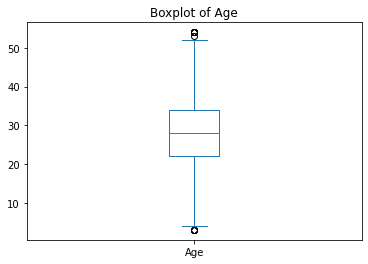

In [46]:
# box plot of Age after reducing outliers
data['Age'].plot(kind='box')
plt.title('Boxplot of Age')

**handling outliers in sibsp column.**

Text(0.5, 1.0, 'Boxplot of SibSp')

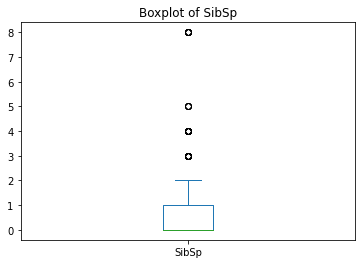

In [47]:
# Diplaying outliers in Sibsp using boxplot
data['SibSp'].plot(kind='box')
plt.title('Boxplot of SibSp')

In [48]:
# executing codes to reduce the outliers
Q1 = np.percentile(data['SibSp'], 25, interpolation = "midpoint")
Q2 = np.percentile(data['SibSp'], 50, interpolation = "midpoint")
Q3 = np.percentile(data['SibSp'], 75, interpolation = "midpoint")
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
upper_lim=Q3+1.5*IQR
print('lower limit is:',low_lim)
print('upper limit is:',upper_lim)
outlier=[]
for x in data['SibSp']:
    if((x>upper_lim) or (x<low_lim)):
        outlier.append(x)
print('outliers are:',outlier) 
ind1=data['SibSp']>upper_lim
data.loc[ind1].index
    

lower limit is: -1.5
upper limit is: 2.5
outliers are: [3, 3, 4, 5, 3, 4, 5, 3, 3, 8, 4, 3, 8, 4, 8, 3, 4, 4, 4, 4, 8, 3, 3, 3, 5, 3, 4, 4, 3, 5, 4, 3, 4, 8, 4, 3, 8, 4, 8]


Int64Index([ 25,  28,  51,  60,  64,  69,  72,  86,  89, 160, 172, 177, 181,
            183, 202, 230, 234, 262, 267, 279, 325, 342, 375, 410, 481, 486,
            542, 543, 635, 684, 687, 727, 788, 793, 814, 820, 847, 851, 864],
           dtype='int64', name='PassengerId')

In [49]:
# dropping the index having outliers
data.drop([25,  28,  51,  60,  64,  69,  72,  86,  89, 160, 172, 177, 181,
            183, 202, 230, 234, 262, 267, 279, 325, 342, 375, 410, 481, 486,
            542, 543, 635, 684, 687, 727, 788, 793, 814, 820, 847, 851, 864],inplace=True)

Text(0.5, 1.0, 'Boxplot of SibSp')

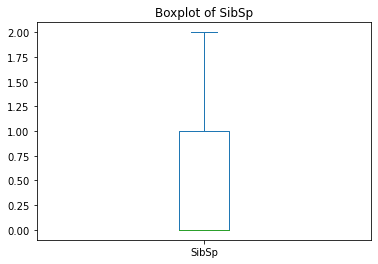

In [50]:
# box plot of Sibsp after reducing outliers
data['SibSp'].plot(kind='box')
plt.title('Boxplot of SibSp')

**handling outliers in Fare column.**

Text(0.5, 1.0, 'Boxplot of Fare')

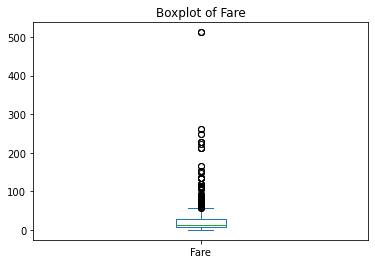

In [51]:
# Diplaying outliers in Fare using boxplot
data['Fare'].plot(kind='box')
plt.title('Boxplot of Fare')

In [52]:
# executing codes to reduce the outliers
Q1 = np.percentile(data['Fare'], 25, interpolation = "midpoint")
Q2 = np.percentile(data['Fare'], 50, interpolation = "midpoint")
Q3 = np.percentile(data['Fare'], 75, interpolation = "midpoint")
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
upper_lim=Q3+1.5*IQR
print('lower limit is:',low_lim)
print('upper limit is:',upper_lim)
outlier=[]
for x in data['Fare']:
    if((x>upper_lim) or (x<low_lim)):
        outlier.append(x)
print('outliers are:',outlier) 
ind1=data['Fare']>upper_lim
data.loc[ind1].index
    

lower limit is: -21.885499999999997
upper limit is: 57.5313
outliers are: [71.2833, 146.5208, 82.1708, 76.7292, 80.0, 83.475, 73.5, 61.175, 63.3583, 77.2875, 247.5208, 73.5, 77.2875, 79.2, 66.6, 61.3792, 113.275, 76.2917, 90.0, 83.475, 90.0, 79.2, 86.5, 512.3292, 79.65, 135.6333, 78.85, 91.0792, 247.5208, 110.8833, 108.9, 83.1583, 262.375, 164.8667, 134.5, 135.6333, 57.9792, 153.4625, 133.65, 66.6, 134.5, 69.3, 135.6333, 82.1708, 211.5, 227.525, 73.5, 120.0, 113.275, 90.0, 120.0, 81.8583, 89.1042, 91.0792, 90.0, 78.2667, 151.55, 86.5, 108.9, 59.4, 93.5, 57.9792, 221.7792, 106.425, 71.0, 106.425, 110.8833, 227.525, 79.65, 110.8833, 79.65, 78.2667, 153.4625, 65.0, 77.9583, 69.3, 76.7292, 73.5, 133.65, 73.5, 512.3292, 76.7292, 211.3375, 110.8833, 227.525, 151.55, 227.525, 211.3375, 512.3292, 78.85, 262.375, 65.0, 86.5, 120.0, 77.9583, 211.3375, 79.2, 120.0, 93.5, 83.1583, 89.1042, 164.8667]


Int64Index([  2,  32,  35,  53,  62,  63,  73,  93,  98, 103,
            ...
            760, 764, 766, 780, 790, 803, 821, 836, 850, 857],
           dtype='int64', name='PassengerId', length=102)

In [56]:
# dropping the index having outliers
data.drop([2, 32, 35, 53, 62, 63, 73, 93, 98, 103, 119, 121, 125, 140, 152, 156, 216, 219, 225, 231, 246, 257, 258, 259, 263, 270, 291, 292, 300, 307, 308, 311, 312, 319, 320, 326, 330, 333, 335, 337, 338, 370, 374, 376, 378, 381, 386, 391, 394, 413, 436, 446, 454, 485, 487, 497, 499, 505, 506, 514, 521, 524, 528, 538, 541, 545, 551, 558, 559, 582, 586, 592, 610, 616, 628, 642, 646, 656, 661, 666, 680, 682, 690, 699, 701, 709, 717, 731, 738, 742, 743, 755, 760, 764, 766, 780, 790, 803, 821, 836, 850, 857],inplace=True)

Text(0.5, 1.0, 'Boxplot of Fare')

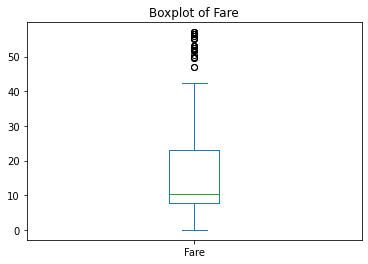

In [57]:
# box plot of Fare after reducing outliers
data['Fare'].plot(kind='box')
plt.title('Boxplot of Fare')

## 6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [61]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [83]:
# taking independent features and assigning allinto a variable x,here dependent feature is 'Survived'.
x=data[['Pclass', 'Age', 'SibSp', 'Parch',
       'Fare']]
x.describe()

,Pclass,Age,SibSp,Parch,Fare
count,684.000000,684.000000,684.000000,684.000000,684.000000
mean,2.504386,28.612573,0.271930,0.267544,16.317275
std,0.714816,9.438662,0.500982,0.755690,12.611508
min,1.000000,3.000000,0.000000,0.000000,0.000000
25%,2.000000,23.000000,0.000000,0.000000,7.854200
50%,3.000000,28.000000,0.000000,0.000000,10.500000
75%,3.000000,33.000000,0.000000,0.000000,23.062500
max,3.000000,54.000000,2.000000,6.000000,57.000000


<function matplotlib.pyplot.show(close=None, block=None)>

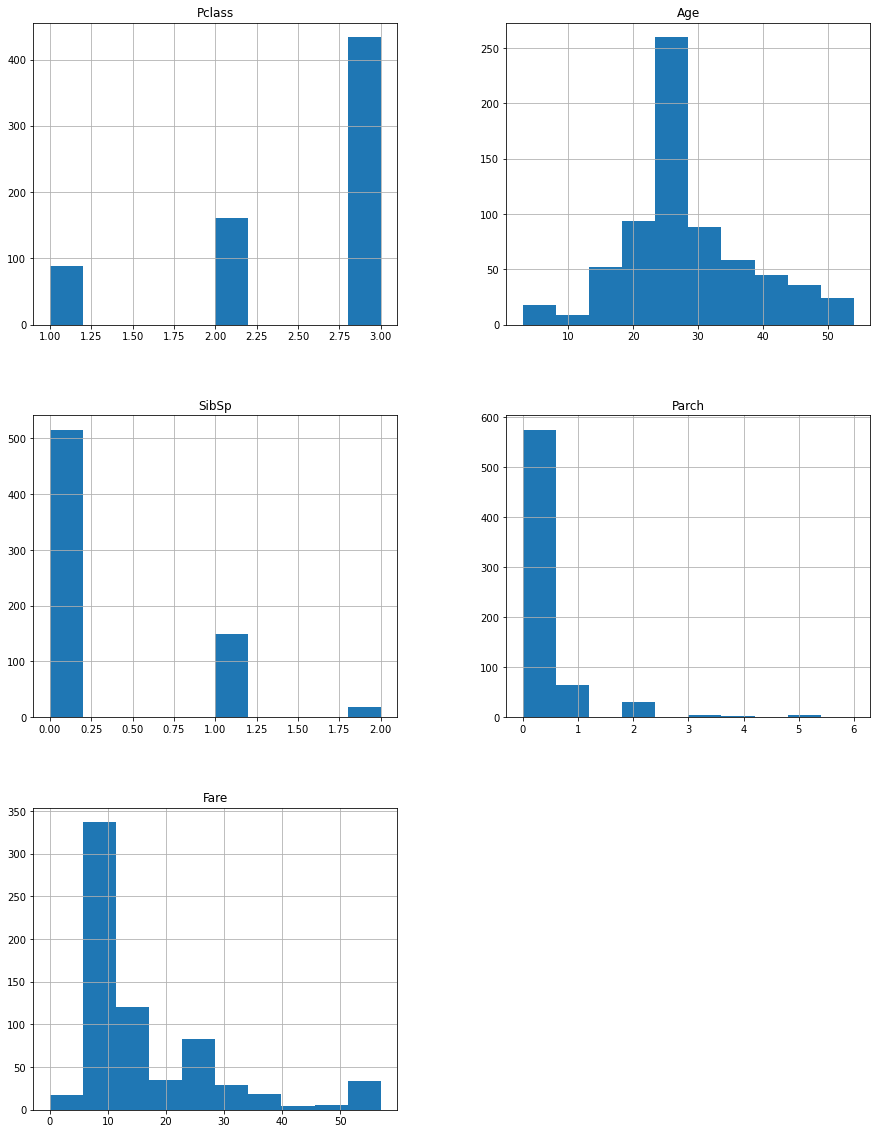

In [84]:
# Hitogram of x shows the distribution. 
freqgraph=x.select_dtypes(include=['float','int'])
freqgraph.hist(figsize=(15,20))
plt.show

In [68]:
type(x)

pandas.core.frame.DataFrame

In [69]:
# performing min_max scaling using sklearn.
from sklearn import preprocessing

In [70]:
min_max=preprocessing.MinMaxScaler(feature_range=(0,1))
x=min_max.fit_transform(x)

In [71]:
x=pd.DataFrame(x)

In [72]:
# displaying the x dataset after min_max scaling using describe function
x.describe()

,0,1,2,3,4
count,684.000000,684.000000,684.000000,684.000000,684.000000
mean,0.752193,0.502207,0.135965,0.044591,0.286268
std,0.357408,0.185072,0.250491,0.125948,0.221255
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.392157,0.000000,0.000000,0.137793
50%,1.000000,0.490196,0.000000,0.000000,0.184211
75%,1.000000,0.588235,0.000000,0.000000,0.404605
max,1.000000,1.000000,1.000000,1.000000,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

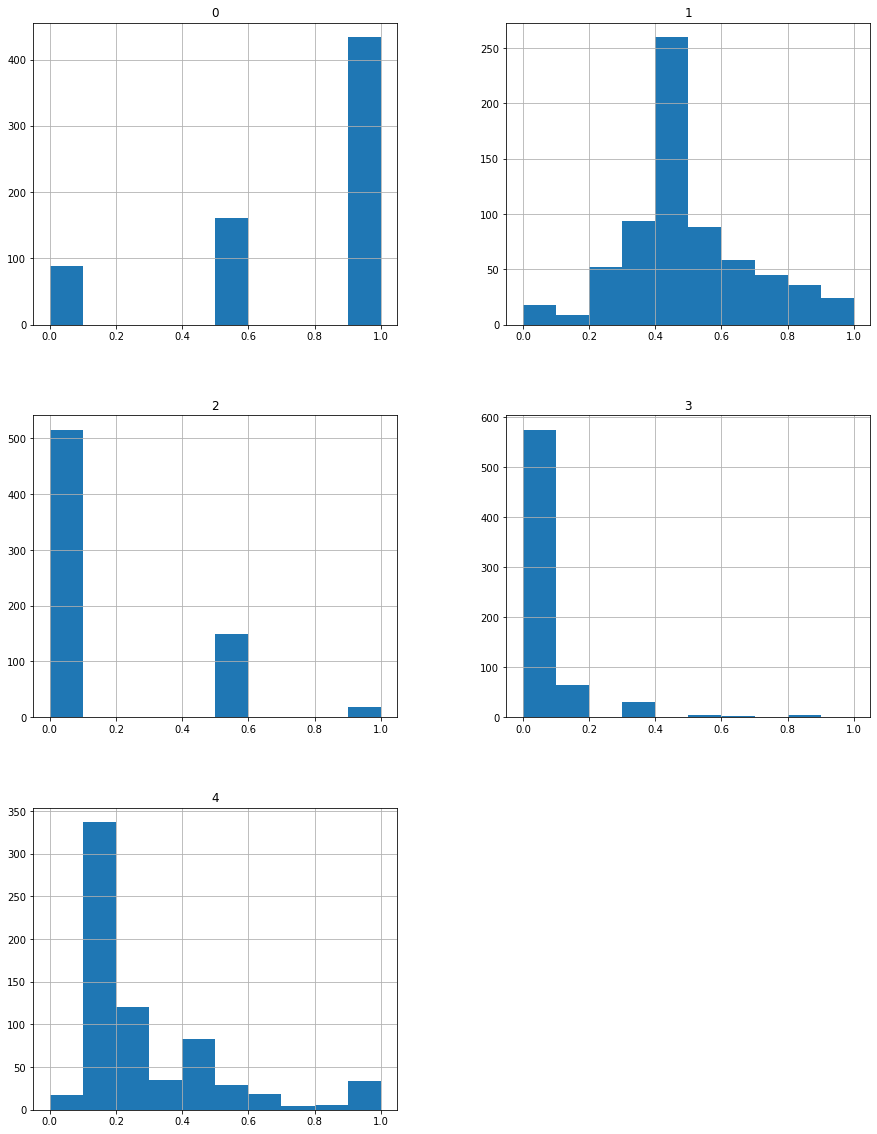

In [81]:
# plotting histogram of x showing the distribution after the min_max scaling
freqgraph=x.select_dtypes(include=['float','int'])
freqgraph.hist(figsize=(15,20))
plt.show

### Insights:

* **The range of all features in x dataset changed to 0 to 1.**
* **The distributions are same for feature set before and after the scaling ,only the range changed.that is the dataset not affected after feature reduction.**
* **the feature reduction helps to understand the dataset in more clear manner.**

Submitted by:**Shameema Muneer,DSA_Batch03.**